# Energy Consumption Analysis with Pruning

**Table of Contents**
- [Introduction](#introduction)
- [Import Required Libraries](#import-required-libraries)
- [Load Results Data](#load-results-data)
- [Usage Examples](#usage-examples)
    - [Example 1: One Model, One Batch Size, One Pruning Distribution](#example-1-one-model-one-batch-size-one-pruning-distribution)
    - [Example 2: One Model, Multiple Batch Sizes](#example-2-one-model-multiple-batch-sizes)
    - [Example 3: Multiple Models, One Batch Size](#example-3-multiple-models-one-batch-size)
    - [Example 4: One Model, Multiple Pruning Distributions](#example-4-one-model-multiple-pruning-distributions)
    - [Example 5: FPS Analysis](#example-5-fps-analysis)
    - [Example 6: Custom Metric (e.g., Accuracy, F1)](#example-6-custom-metric-eg-accuracy-f1)



---

## Introduction

This notebook loads a CSV file with experimental results and uses the `AnalysisPlotter` class to visualize the data.

You can choose any column from your DataFrame as the X or Y axis. Below are some usage examples.



---

## Import Required Libraries

Import the necessary Python libraries and custom plotting classes.


In [1]:
import sys
import os

lib_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path.append(lib_path)

import pandas as pd
from PruneEnergyAnalizer import AnalysisPlotter, plot_energy_and_metric_curve


---

## Load Results Data

Load your experimental results from a CSV file.


In [2]:
# Load the CSV file
df = pd.read_csv("results_with_compression_ratios.csv")
df

,MODEL_NAME,BATCH_SIZE,Mean Time per Sample (s),FPS,STD Time per Sample (s),Mean Energy per Sample (J),STD Energy per Sample (J),Parameters,FLOPs,GPR,Architecture,Pruning Distribution,YOUR_METRIC,CR (%) measured in Parameters,CR (%) measured in FLOPs,Energy Reduction (%)
0,AlexNet_DATASET_random_PD3_GPR-40_PRUNED_SEED_...,1,0.001067,937.360405,1.630872e-04,0.179271,0.020604,29288367,287175794,40,AlexNet,PD3,0.517827,52.0,60.0,33.0
1,AlexNet_DATASET_random_PD3_GPR-40_PRUNED_SEED_...,8,0.000128,7820.735324,7.151073e-06,0.034128,0.001762,29288367,2297406352,40,AlexNet,PD3,0.517827,52.0,60.0,39.0
2,AlexNet_DATASET_random_PD3_GPR-40_PRUNED_SEED_...,16,0.000076,13163.687820,5.275919e-06,0.022645,0.000626,29288367,4594812704,40,AlexNet,PD3,0.517827,52.0,60.0,44.0
3,AlexNet_DATASET_random_PD3_GPR-40_PRUNED_SEED_...,32,0.000063,15791.149994,1.574052e-07,0.019305,0.000840,29288367,9189625408,40,AlexNet,PD3,0.517827,52.0,60.0,43.0
4,AlexNet_DATASET_random_PD3_GPR-40_PRUNED_SEED_...,64,0.000060,16753.248936,2.279891e-07,0.018104,0.000374,29288367,18379250816,40,AlexNet,PD3,0.517827,52.0,60.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,VGG16_DATASET_random_PD5_GPR-15_PRUNED_SEED_23...,1,0.003198,312.691602,1.393133e-06,1.014720,0.002878,105475850,11196053973,15,VGG16,PD5,0.531742,24.0,28.0,-10.0
986,VGG16_DATASET_random_PD5_GPR-15_PRUNED_SEED_23...,8,0.001798,556.158070,2.682008e-07,0.560247,0.000482,105475850,89568431784,15,VGG16,PD5,0.531742,24.0,28.0,0.0
987,VGG16_DATASET_random_PD5_GPR-15_PRUNED_SEED_23...,16,0.001701,587.937494,8.066138e-07,0.542115,0.001701,105475850,179136863568,15,VGG16,PD5,0.531742,24.0,28.0,-3.0
988,VGG16_DATASET_random_PD5_GPR-15_PRUNED_SEED_23...,32,0.001611,620.593181,2.604402e-07,0.513291,0.000686,105475850,358273727136,15,VGG16,PD5,0.531742,24.0,28.0,-4.0



---

## Usage Examples

Below are several common plotting scenarios using the `AnalysisPlotter`. You can adapt these templates to your own experiments.



---

### Example 1: One Model, One Batch Size, One Pruning Distribution

The library internally generates three types of plots: 
- Basic (showing mean values)
- Smoothed (spline interpolation)
- Moving average

Choose the plot that provides the most insight for your data.


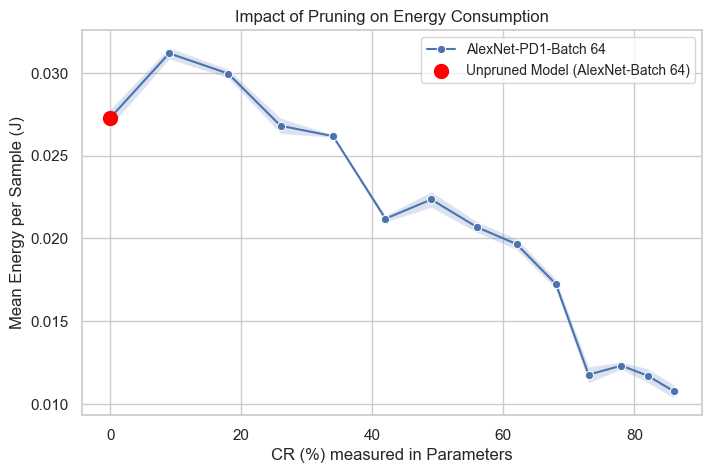

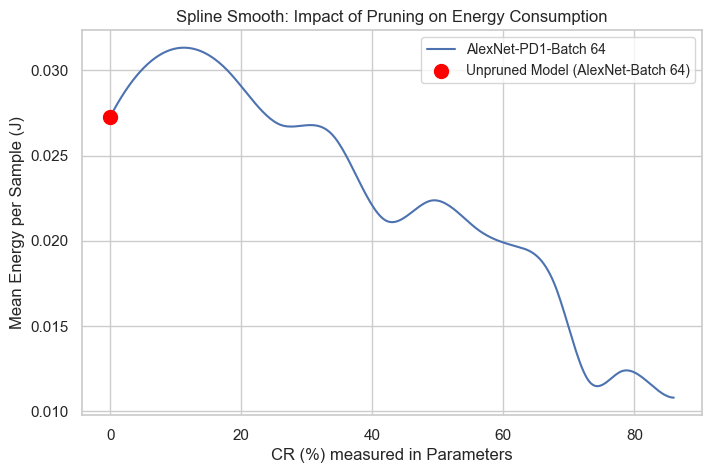

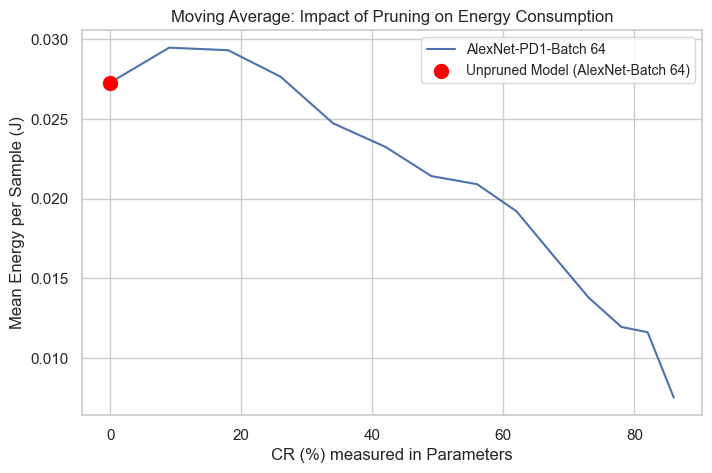

In [4]:
# Create an instance of AnalysisPlotter
plotter = AnalysisPlotter(
    dataframe=df, 
    x_column="CR (%) measured in Parameters", 
    y_column="Mean Energy per Sample (J)", 
    title="Impact of Pruning on Energy Consumption"
)

# Generate the plot for a specific architecture, pruning distributions, and batch size
plotter.plot_data(
    architectures=["AlexNet"],
    pruning_distributions=["PD1"],
    batch_sizes=[64]
    )


---

### Example 2: One Model, Multiple Batch Sizes


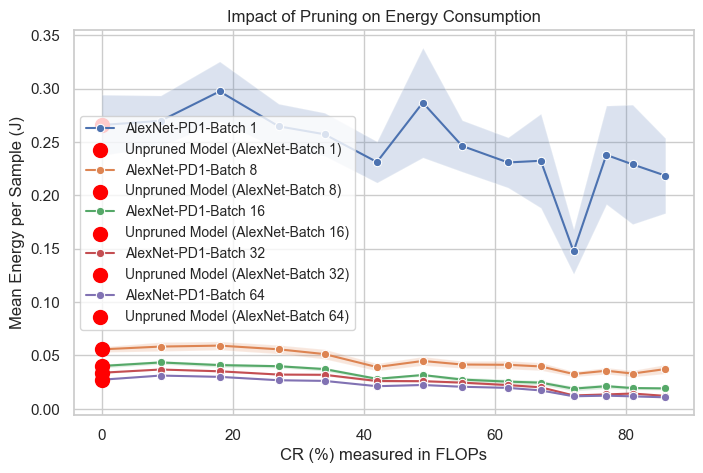

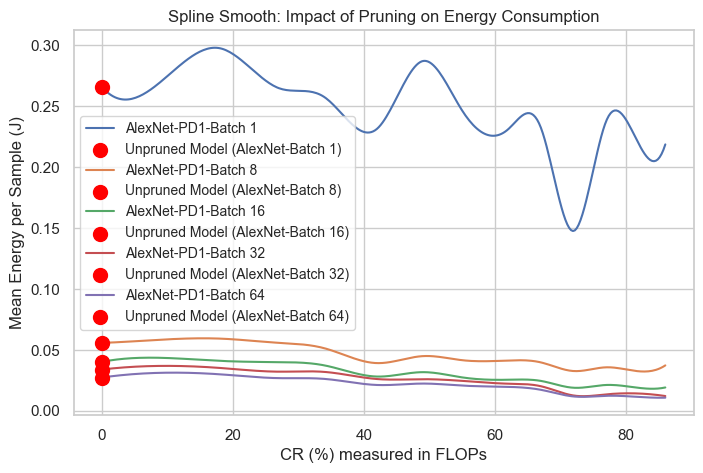

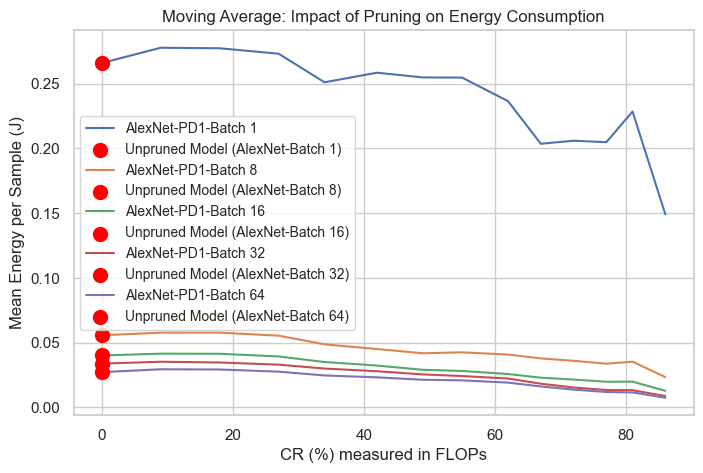

In [5]:
# Create an instance of AnalysisPlotter
plotter = AnalysisPlotter(
    dataframe=df, 
    x_column="CR (%) measured in FLOPs", 
    y_column="Mean Energy per Sample (J)", 
    title="Impact of Pruning on Energy Consumption"
)

# Generate the plot for a specific architecture, pruning distributions, and batch size
plotter.plot_data(
    architectures=["AlexNet"],
    pruning_distributions=["PD1"],
    batch_sizes=[1,4,8,16,32,64]
    )


---

### Example 3: Multiple Models, One Batch Size


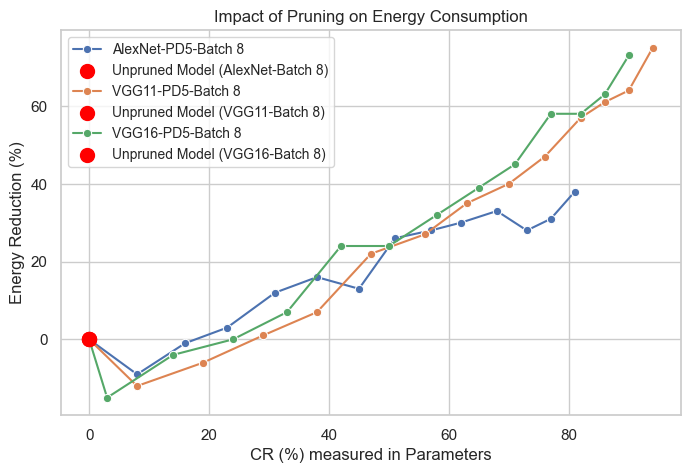

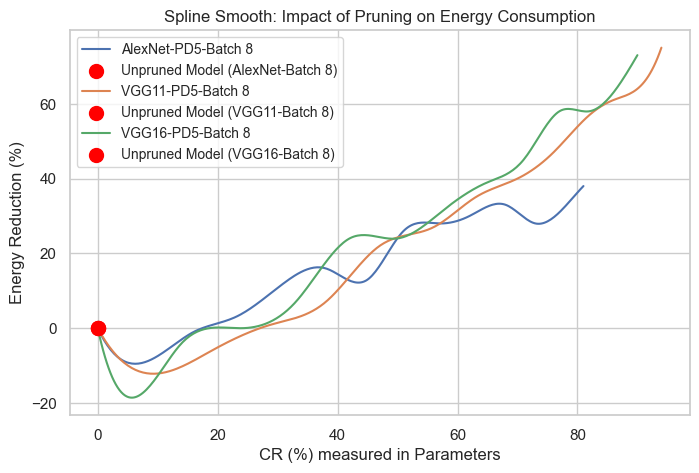

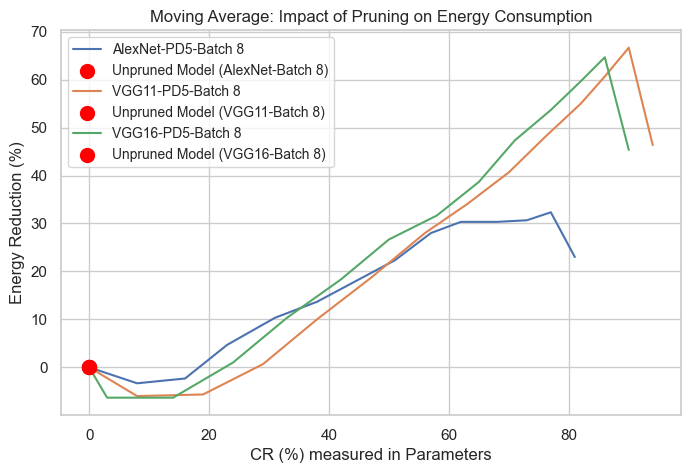

In [6]:
# Create an instance of AnalysisPlotter
plotter = AnalysisPlotter(
    dataframe=df, 
    x_column="CR (%) measured in Parameters", 
    y_column="Energy Reduction (%)", 
    title="Impact of Pruning on Energy Consumption"
)

# Generate the plot for a specific architecture, pruning distributions, and batch size
plotter.plot_data(
    architectures=["AlexNet","VGG11","VGG16"],
    pruning_distributions=["PD5"],
    batch_sizes=[8]
    )


---

### Example 4: One Model, Multiple Pruning Distributions


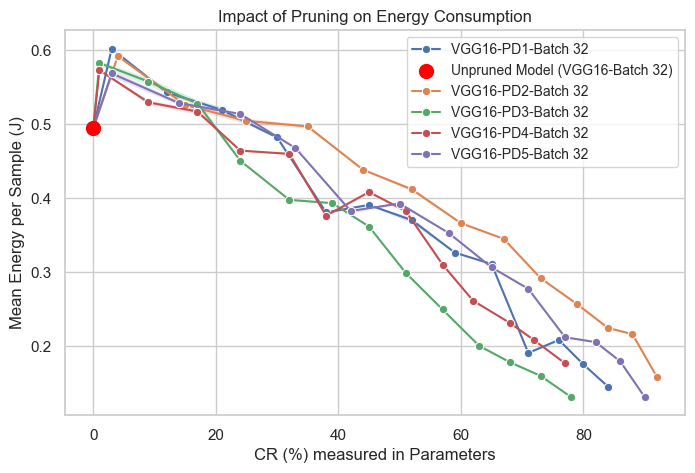

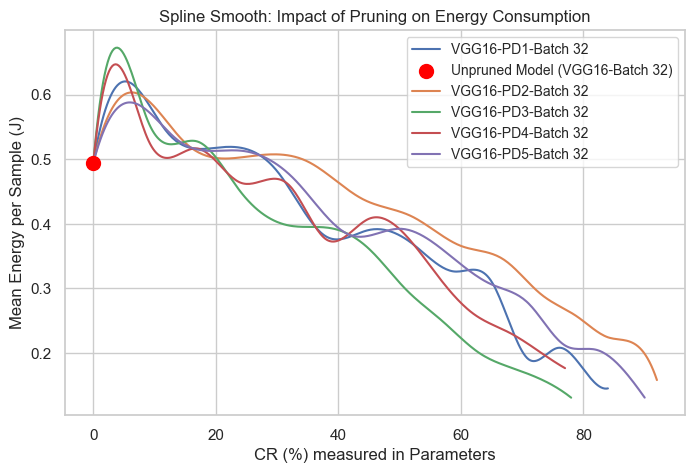

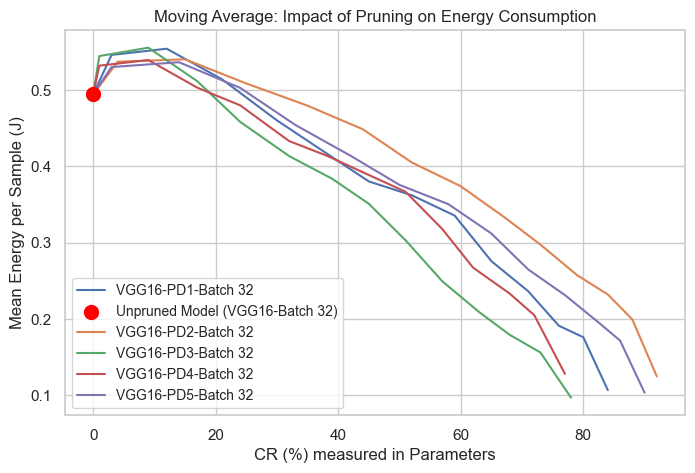

In [7]:
# Load the CSV file
df = pd.read_csv("results_with_compression_ratios.csv")

# Create an instance of AnalysisPlotter
plotter = AnalysisPlotter(
    dataframe=df, 
    x_column="CR (%) measured in Parameters", 
    y_column="Mean Energy per Sample (J)", 
    title="Impact of Pruning on Energy Consumption"
)

# Generate the plot for a specific architecture, pruning distributions, and batch size
plotter.plot_data(
    architectures=["VGG16"],
    pruning_distributions=["PD1", "PD2", "PD3", "PD4", "PD5"],
    batch_sizes=[32]
    )


---

### Example 5: FPS Analysis


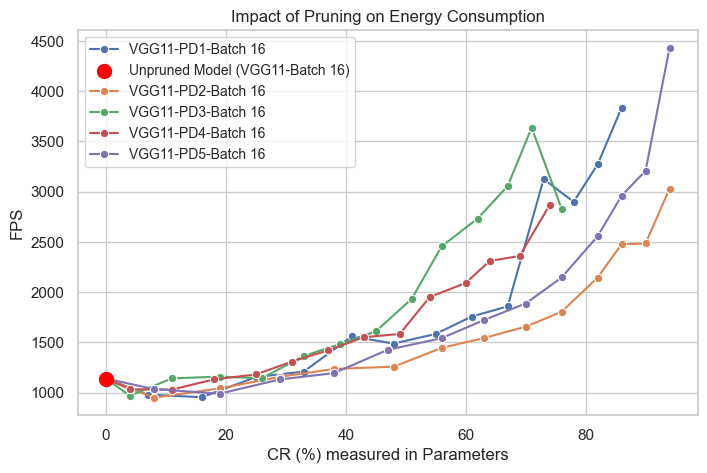

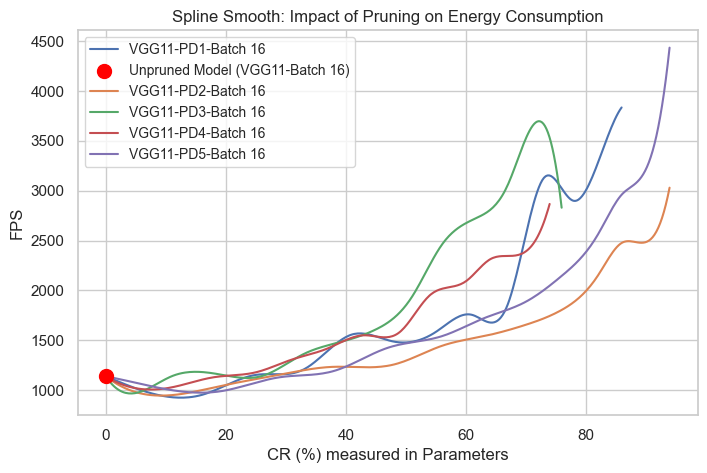

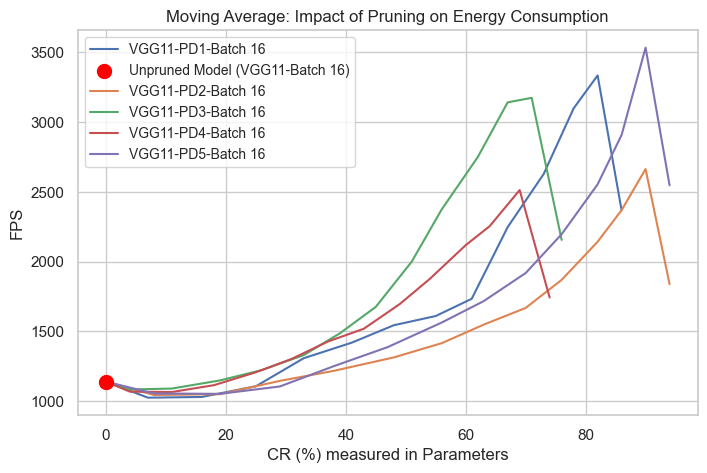

In [8]:
# Load the CSV file
df = pd.read_csv("results_with_compression_ratios.csv")

# Create an instance of AnalysisPlotter
plotter = AnalysisPlotter(
    dataframe=df, 
    x_column="CR (%) measured in Parameters", 
    y_column="FPS", 
    title="Impact of Pruning on Energy Consumption"
)

# Generate the plot for a specific architecture, pruning distributions, and batch size
plotter.plot_data(
    architectures=["VGG11"],
    pruning_distributions=["PD1", "PD2", "PD3", "PD4", "PD5"],
    batch_sizes=[16]
    )


---

### Example 6: Custom Metric (e.g., Accuracy, F1)

If you have added a custom metric column (e.g., accuracy or F1-score), you can plot energy consumption against your metric of interest and, for example, compression ratio. 
Currently, the visualization supports one model, one pruning distribution, and one batch size at a time.


In [9]:
# Make sure to select a specific architecture, batch size, and pruning distribution to compute the metric

model_for_metric = df[(df["Architecture"] == "VGG16") &
                      (df["BATCH_SIZE"] == 1) & 
                      (df["Pruning Distribution"] == 'PD1')]
model_for_metric

,MODEL_NAME,BATCH_SIZE,Mean Time per Sample (s),FPS,STD Time per Sample (s),Mean Energy per Sample (J),STD Energy per Sample (J),Parameters,FLOPs,GPR,Architecture,Pruning Distribution,YOUR_METRIC,CR (%) measured in Parameters,CR (%) measured in FLOPs,Energy Reduction (%)
670,VGG16_DATASET_random_PD1_GPR-50_PRUNED_SEED_23...,1,0.002366,422.742185,0.000432,0.567410,0.071150,40783720,3890278656,50,VGG16,PD1,0.223638,71.0,75.0,39.0
675,VGG16_DATASET_random_PD1_GPR-5_PRUNED_SEED_23.pth,1,0.003763,265.727853,0.000003,1.192780,0.022554,134793922,13981588329,5,VGG16,PD1,0.266494,3.0,10.0,-29.0
680,VGG16_DATASET_random_PD1_GPR-25_PRUNED_SEED_23...,1,0.002504,399.421708,0.000313,0.761842,0.061008,86346280,8719067520,25,VGG16,PD1,0.081209,38.0,44.0,17.0
740,VGG16_DATASET_random_PD1_GPR-20_PRUNED_SEED_23...,1,0.003015,331.699739,0.000072,0.950408,0.028724,97541086,9902648301,20,VGG16,PD1,0.952670,30.0,36.0,-3.0
805,VGG16_DATASET_random_PD1_GPR-15_PRUNED_SEED_23...,1,0.003233,309.294519,0.000022,1.023612,0.023682,109232602,11179781073,15,VGG16,PD1,0.220021,21.0,28.0,-11.0
840,VGG16_DATASET_random_PD1_GPR-65_PRUNED_SEED_23...,1,0.002597,385.105159,0.000481,0.566430,0.069174,21478842,1911761105,65,VGG16,PD1,0.258286,84.0,88.0,39.0
850,VGG16_DATASET_random_PD1_GPR-45_PRUNED_SEED_23...,1,0.002267,441.150512,0.000415,0.661050,0.074822,48595678,4693325037,45,VGG16,PD1,0.344774,65.0,70.0,28.0
855,VGG16_DATASET_random_PD1_GPR-35_PRUNED_SEED_23...,1,0.002446,408.895024,0.000070,0.767255,0.027050,66138810,6564073259,35,VGG16,PD1,0.951192,52.0,58.0,17.0
865,VGG16_DATASET_random_PD1_GPR-55_PRUNED_SEED_23...,1,0.002210,452.588261,0.000133,0.578217,0.025059,33653698,3162646377,55,VGG16,PD1,0.993754,76.0,80.0,37.0
875,VGG16_DATASET_random_PD1_GPR-60_PRUNED_SEED_23...,1,0.002168,461.254809,0.000158,0.542572,0.026507,27280970,2501722027,60,VGG16,PD1,0.616971,80.0,84.0,41.0


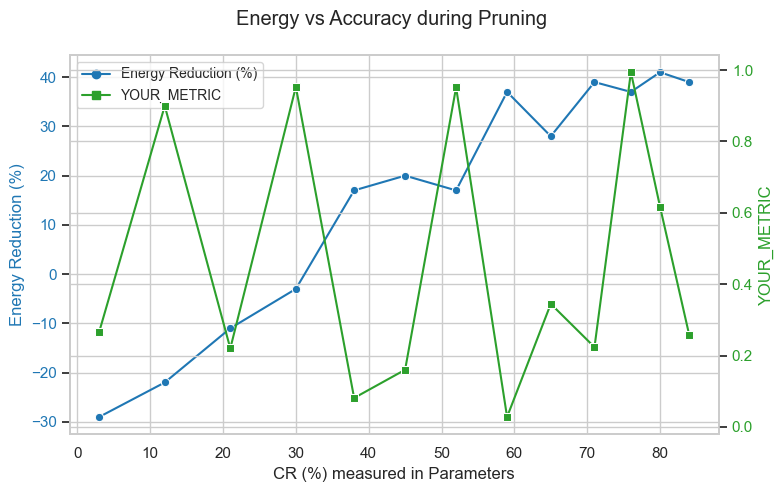

In [10]:
plot_energy_and_metric_curve(
    dataframe=model_for_metric,
    x_column="CR (%) measured in Parameters",
    energy_column="Energy Reduction (%)",
    metric_column="YOUR_METRIC", # Replace with the actual metric column name
    title="Energy vs Accuracy during Pruning"
)